![pic](../gmsh.png)

In [1]:
import gmsh
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib import cm, patches, collections


In [2]:
mesh_file='/bettik/alberta/small-arctic-10km-sidfex/experiments/run_330d_partnodisk/par32small_arctic_10km.msh'


In [3]:
gmsh.initialize()

In [4]:
gmsh.open(mesh_file)

Info    : Reading '/bettik/alberta/small-arctic-10km-sidfex/experiments/run_330d_partnodisk/par32small_arctic_10km.msh'...
Info    : 65350 nodes
Info    : 128912 elements
Info    : Converting old partitioning...                                   
Info    : Creating partition topology...
Info    :  - Creating partition curves
Info    :  - Creating partition points
Info    : Done creating partition topology
Info    : Done reading '/bettik/alberta/small-arctic-10km-sidfex/experiments/run_330d_partnodisk/par32small_arctic_10km.msh'


In [5]:
gmsh.model.getNumberOfPartitions()

32

In [6]:
el=gmsh.model.mesh.get_element(68973)
print(el)
eltyp,nodetags,dim,tag = gmsh.model.mesh.get_element(68973)

(2, array([56794, 12347, 33329], dtype=uint64), 2, 22)


In [7]:
part = gmsh.model.getPartitions(dim, tag)
print(part)

[18]


In [8]:
print(nodetags)

[56794 12347 33329]


In [9]:
n1=gmsh.model.mesh.get_node(56794)
print(n1)
n1_coord=n1[0]
print(n1_coord)
n1_x=n1_coord[0]
n1_y=n1_coord[1]

(array([114069.20411975, 620149.12953353,      0.        ]), array([], dtype=float64), 2, 22)
[114069.20411975 620149.12953353      0.        ]


In [10]:
n2=gmsh.model.mesh.get_node(12347)
print(n2)
n2_coord=n2[0]
n2_x=n2_coord[0]
n2_y=n2_coord[1]

(array([108467.40057958, 628976.97994148,      0.        ]), array([], dtype=float64), 2, 22)


In [11]:
n3=gmsh.model.mesh.get_node(33329)
print(n3)
n3_coord=n3[0]
n3_x=n3_coord[0]
n3_y=n3_coord[1]

(array([102968.41610799, 621159.94815675,      0.        ]), array([], dtype=float64), 2, 22)


In [12]:
print(np.min([n1_x,n2_x,n3_x]))

102968.41610799404


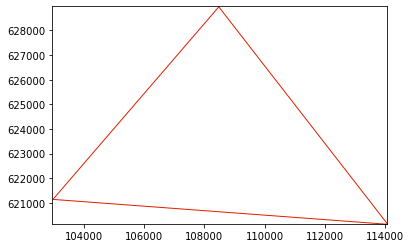

In [13]:
ax = plt.figure().add_subplot(111)
fig = ax.figure

ax.set_xlim([np.min([n1_x,n2_x,n3_x]),np.max([n1_x,n2_x,n3_x])])
ax.set_ylim([np.min([n1_y,n2_y,n3_y]),np.max([n1_y,n2_y,n3_y])])



In [15]:
print(len(eltstag[0]))


126664


In [ ]:
ax = plt.figure().add_subplot(111)
fig = ax.figure

eltstyp,eltstag,eltsnodetags = gmsh.model.mesh.getElements(dim=2, tag=-1)

#Set up the triangles
patch_list  = []

for t in np.arange(len(eltstag[0])):
    tag1 = eltstag[0][t]
    eltyp,nodetags,dim,tag2 = gmsh.model.mesh.get_element(tag1)

    n1=gmsh.model.mesh.get_node(nodetags[0])
    n1_coord=n1[0]
    n1_x=n1_coord[0]
    n1_y=n1_coord[1]

    n2=gmsh.model.mesh.get_node(nodetags[1])
    n2_coord=n2[0]
    n2_x=n2_coord[0]
    n2_y=n2_coord[1]

    n3=gmsh.model.mesh.get_node(nodetags[2])
    n3_coord=n3[0]
    n3_x=n3_coord[0]
    n3_y=n3_coord[1]
    
    ccl   = []
    ccl.append((n1_x,n1_y))
    ccl.append((n2_x,n2_y))
    ccl.append((n3_x,n3_y))
    ccl.append(ccl[0])
    patch_list.append(patches.Polygon(ccl,True,linewidth=0))
    
    pc = collections.PatchCollection(patch_list, cmap='binary', alpha=1)
    pc.set_array(np.zeros(1))

    #Set the color of the edge according to partition number
    cmap = matplotlib.cm.get_cmap('brg')
    rgba = cmap(tag2/32)
    pc.set_edgecolor(rgba)

ax.add_collection(pc)


In [17]:
print(nb)

0


In [ ]:
print(len(dimtags))

In [ ]:
for t in np.arange(len(dimtags)):
    print(gmsh.model.getEntityName(dimtags[t][0], dimtags[t][1]))